<a href="https://colab.research.google.com/github/netgvarun2021/IMDB.Fellowship.AI/blob/main/IMDBSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB Dataset**

---



#### IMDB Reviews Dataset is a large movie review dataset prepared by Andrew Maas from the popular movie rating website, IMDB.
#### It contains 25,000 movie reviews for training and 25,000 for testing. All these 50,000 reviews are labeled data that may be used for supervised deep learning. Besides, there is an additional 50,000 unlabeled reviews that we will not use in this case study. In this case study, we will only use the training dataset.

# **Problem Statement**
---




###         Goal is to predict if a particular movie review is '*Negative*' or '*Positive*' using NLP technique called *'Sentiment Analysis'*.

# **Some Background to Sentiment Analysis in NLP**
---


#### Sentiment analysis, also referred to as opinion mining, is an approach to natural language processing (NLP) that identifies the emotional tone behind a body of text.

#### In simplistic term, in NLP tasks, whether  its Text classification like SPAM vs HAM or Product review analysis, we need to create Numerical features known as **'word vectors'/'word embeddings'** from the words/text supplied as input in order to obtain high level of accuracy.

#### Sentiment analysis, takes this concept bit further as the goal is not only to represent individual  words as vectors/numbers (features), but also "to develop a sense of similarity  and difference between individual words as well".

### There are a number of 'pre-trained' models available to achieve this task :


1.   **One-Hot Encoding** - A rudimentry process as each vector dimension corresponds to the total number of words in the corpus/dictionary. So, only suitable for corpus/vocab of <500 words. (Custom dictionary of features/vocab will be created for each input text/document).

2.   **Word2Vec** - Word2Vec creates 'word vectors'/'word embeddings' that are distributed numerical representations of word features, features such as the context of individual words using either of below 2 ways:
			1. CBOW (Continous Bag of Words) - Uses 'context' to predict the 'target word'.
			2. Skip-Grams - Uses a 'word' to predict a 'targeted context'.


<div align="center">
    <img width="512px" src='https://drive.google.com/uc?export=view&id=1xSIRvE-h6n8oWfdcutY7fSCMgXUaCKBb' />
    <p style="text-align: center;color:gray">Figure 1: Two Approaches in Word2Vec</p>
</div>

  Once We have each word mapped to the a vector, we can use **'Cosine-Similarity'** to measure how similar word vectors are to each other.

3.   **Glove** : This prepares a 'co-occurence matrix' i.e. matrix of unique words with values denoting the number of times (in terms of probability) that word occurs w.r.t other words. Idea is to derive semantic relationships between words from this co-occurrence matrix. But, problem arises when your vocabulary becomes large.

4. **VADER (NLTK)** : Primarily, VADER sentiment analysis relies on a dictionary which maps lexical features to emotion intensities called sentiment scores. The sentiment score of a text can then be attained by summing up the intensity of each word in the text.


4.   **BERT** : BERT is different as it focusses on 'Full sentences' to find vectors instead of individual words. It is very convenient as we can obtain great results just by training the last layers. 

  Basic unit to 'BERT' is a transformer. The 'byproduct' of the transformer process is 'word embeddings' which can then be used to train your models quickly for certain applications such as 'Movie review classification', 'SPAM vs HAM' etc






# **Introduction to the BERT Model**
---




## BERT stands for *Bidirectional Encoder Representations from Transformers.*




## A lot of times, in NLP, we need to keep training embeddings from the scratch, for every new application and a lot of times the data is not available. 
## BERT allows us to use 'transfer learning' where we can use the embeddings that are already trained by Google and learn it for your domain very quickly with the less amount of data just by re-training the last layer.

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?export=view&id=1LC0qgHuwXa_UERMBZFk81OF4C3Xk7lou' />    
    <p style="text-align: center;color:gray">Figure 2. Overall pre-training and fine-tuning procedures for BERT (Figure from the BERT paper)
</p>
</div>

# **Approach Followed**:
---







*   Installation of required libraries and pre-requisites.
*   Loading of data stored in Google drive to pandas dataframes.

*   Data cleaning and exploratory data analysis (EDA). 
*   Splitting of data into training, validation and test sets.

*   Converting data into tensors using *'from_tensor_slices'*.
*   Download a pre-trained *'BERT Model'* and Instantiate *'Bert Layer'* & *'Tokenizer'* from *'TensorFlow Hub'*.

*   Implement *'BERT Preprocessor'* layer using the *'Tokenizer'* instantiated above.
*   Implement *'BERT'* layer using the 3 outputs of the *'BERT Preprocessor'* layer.
*   Implement *'KERAS'* layer.
*   Train the model on the training data.
*   Evaluate the model performance.
*   Explore further fine-tuning options.
*   Using Flask, deploy the Model on the web.









# **Installation of required libraries and pre-requisites.**

---



## Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).



In [1]:
!nvidia-smi

Mon Nov 29 14:49:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Using 'TensorFlow' as backend
### Install TensorFlow and TensorFlow Model Garden

In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.7.0


In [3]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 506), reused 1388 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 12.10 MiB/s, done.
Resolving deltas: 100% (506/506), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [4]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     |████████████████████████████████| 7.8 MB 4.6 MB/s 
     |████████████████████████████████| 203 kB 42.4 MB/s 
     |████████████████████████████████| 15.7 MB 60.5 MB/s 
     |████████████████████████████████| 11.3 MB 50.3 MB/s 
     |████████████████████████████████| 296 kB 54.2 MB/s 
     |████████████████████████████████| 99 kB 11.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 213 kB 60.5 MB/s 
     |████████████████████████████████| 4.0 MB 46.6 MB/s 
     |████████████████████████████████| 1.1 MB 40.2 MB/s 
     |████████████████████████████████| 352 kB 63.5 MB/s 
     |████████████████████████████████| 1.2 MB 56.6 MB/s 
     |████████████████████████████████| 11.2 MB 40.1 MB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 
     |████████████████████████████████| 596 kB 40.0 MB/s 
     |████████████████████████████████| 3.1 MB 40.7 MB/s 
     |████████████████████████████████| 45 kB 4.1 MB/s 
     |█████████

## From the GoogleDrive, We will read the DataSet zip file.
There are two top-level directories [train/, test/] corresponding to the training and test sets. Each contains [pos/, neg/] directories for the reviews with binary labels positive and negative. Within these directories, reviews are stored in text files named following the convention [[id]_[rating].txt] where [id] is a unique id and [rating] is the star rating for that review on a 1-10 scale.

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!unzip -q /content/gdrive/MyDrive/Colab\ DataSet/DataSet.zip

warning [/content/gdrive/MyDrive/Colab DataSet/DataSet.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [/content/gdrive/MyDrive/Colab DataSet/DataSet.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #100020).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)


In [1]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization
import seaborn as sns

We can form the Dataframe for the training data by traversing through the subdirectories as shown below.

In [2]:
imdb_dir = 'DataSet/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='UTF-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [3]:
import pandas as pd
df = pd.DataFrame(list(zip(texts,labels)),
                  columns = ['Review','Label'])

# **Exploratory Data Analysis**

---






In [4]:
df.shape # Our Training Dataset has total 25000 Movie reviews.

(25000, 2)

In [5]:
df.head() # Let's check first 5 Reviews

,Review,Label
0,This movie is so bad it's funny. It stars Scot...,0
1,"I'm a big fan of Pacino movies. He's one of, i...",0
2,I heard this film was much more stylistic than...,0
3,I watched this movie last week sometime and ha...,0
4,The Invisible Maniac starts as a young Kevin D...,0


### Let's check one particular positive review !

In [6]:
df['Review'].iloc[24995] # Positive review

'One of the most provocative films ever with excellent cinematography backed up by Mc Clarens lisp and stunning quote "do you believe in love at first site?".<br /><br />A trace of expressionism was evident in this picture, further catapulting the films flawless integrity. Gabby (AKA Joey) played by Eva Longoria clearly loved the movie and role she played so much that she couldn\'t even be bothered giving it mention in her filmography. Lol.<br /><br />the best part of the movie would have to be without a doubt, the heroic rescue by MC clure as he saved the young \'Handicapped\' kid with the speech impediment.. Which i may add was acted to perfection! James Cahiil\'s use of sound effects is unmatched even to this day. The drug bust he performs early in the film is pain stakingly realistic. When i watched this movie for the first time i was so compelled with the intense lack of respect for the Gang Inthused brothers from the Southside gang and the CTM (Cut Throat Mafia). This was by far 

### Let's See if the Dataset is balanced or not!

<AxesSubplot:title={'center':'target distrubution'}, ylabel='Frequency'>

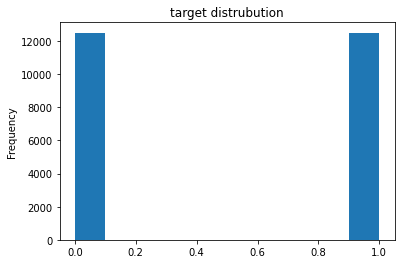

In [7]:
df.Label.plot(kind = 'hist', title='target distrubution')

Dataset seems to be divided equally. This means that the no. of positive reviews is equal to the no. of negative reviews in the dataset. This is a good thing since it means our dataset is not skewed.

### Let's Check for NULL values

In [8]:
df['Review'].isnull().sum()

0

In [9]:
df['Label'].isnull().sum()

0

No Null values discovered.

### Often there are blank whitespaces instead of null in a DataSet. Let's check for them!

In [10]:
# Check for whitespace strings (it's OK if there aren't any!):
whitespaces=[]
for index,rev,label in df.itertuples():
    if type(rev)==str:
        if rev.isspace():
            whitespaces.append(index)    
whitespaces

[]

No Blank spaces as well. So far So good !

<function matplotlib.pyplot.show>

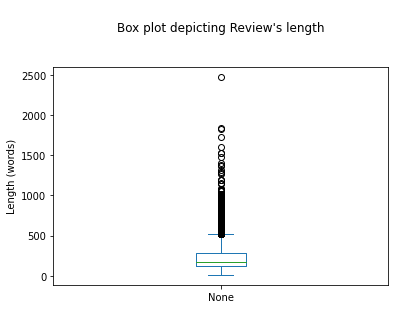

In [11]:
# Calculate review lengths
review_len = pd.Series([len(review.split()) for review in df['Review']])

# The distribution of review text lengths
review_len.plot(kind='box')
plt.title('\nBox plot depicting Review\'s length\n\n')
plt.ylabel('Length (words)')
plt.show

Most of the Reviews are spread in the range of length 500 to 1500. 

Now, Let's visualize how long our sentences are there in the training data

<AxesSubplot:ylabel='Count'>

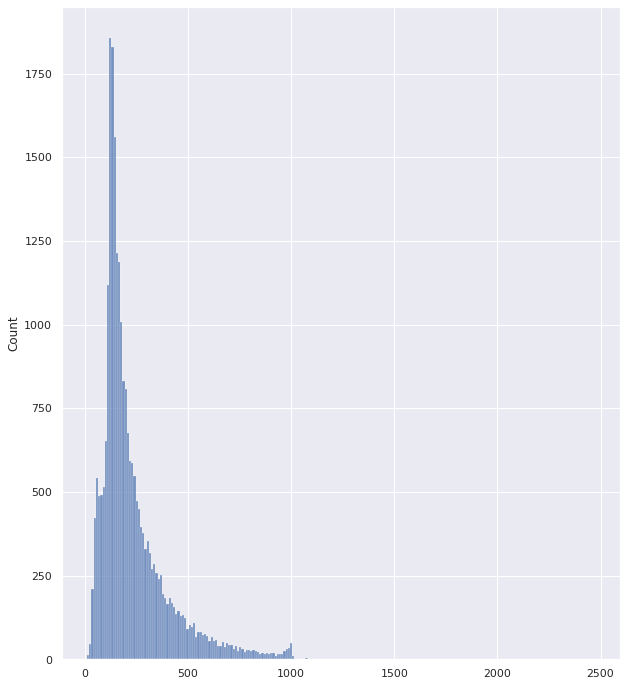

In [12]:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)

plt.figure(figsize = (10,12))
sns.histplot(review_len)

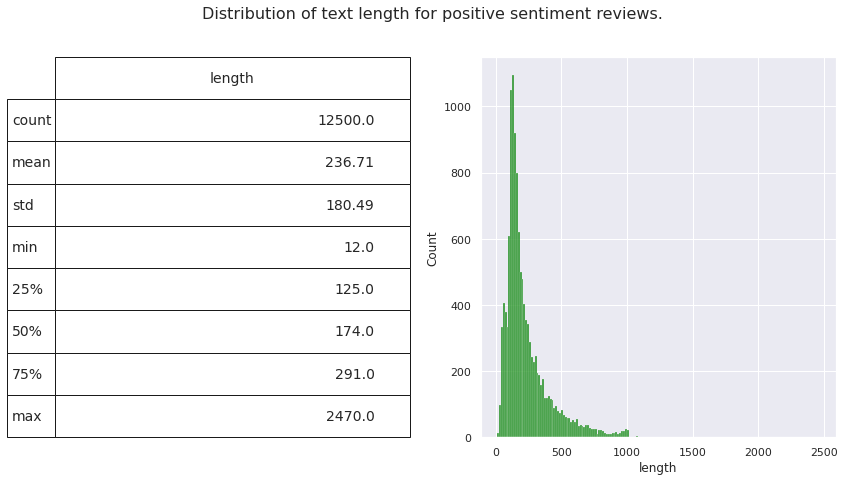

In [13]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Label']==1]['length'], ax=ax1,color='green')
describe = df.length[df.Label==1].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment reviews.', fontsize=16)

plt.show()

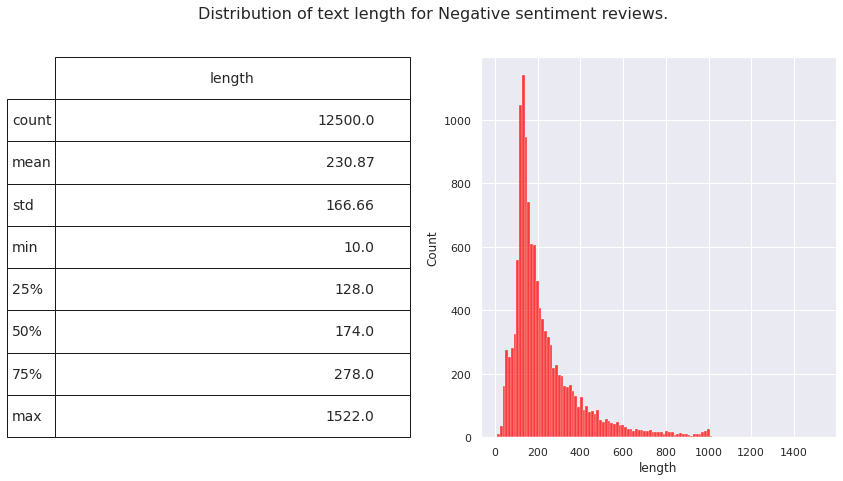

In [14]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Label']==0]['length'], ax=ax1,color='red')
describe = df.length[df.Label==0].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment reviews.', fontsize=16)

plt.show()

Text(0.5, 1.0, '\nWord Cloud for Negative Reviews\n\n')

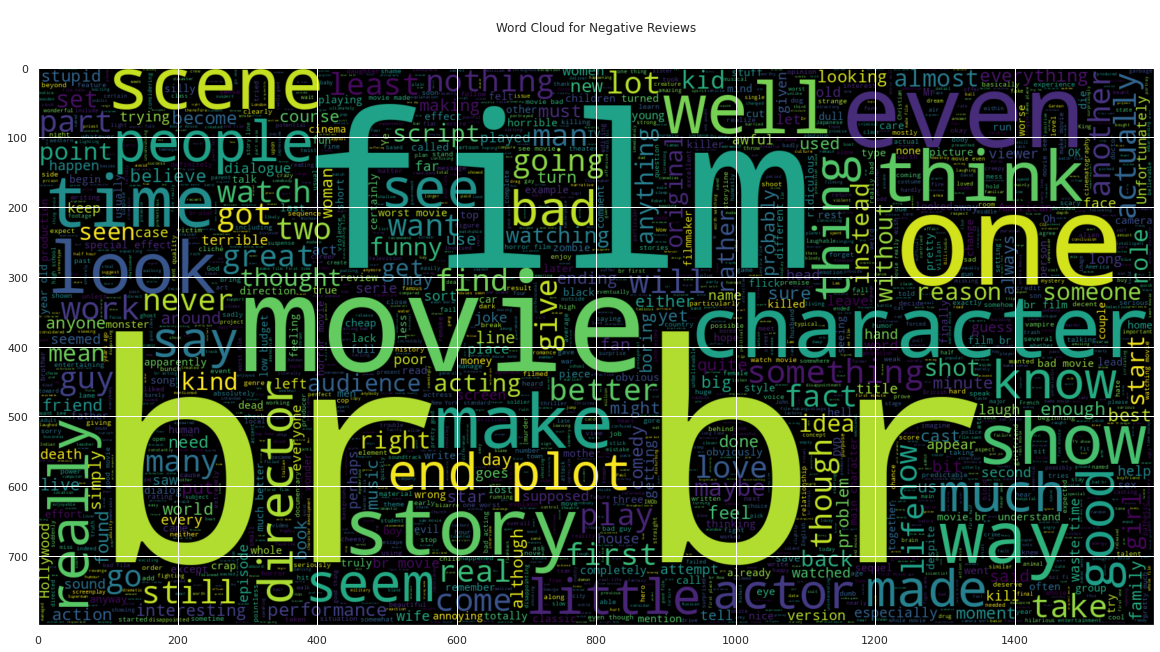

In [15]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Label == 0].Review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('\nWord Cloud for Negative Reviews\n\n')

Text(0.5, 1.0, '\nWord Cloud for Positive Reviews\n\n')

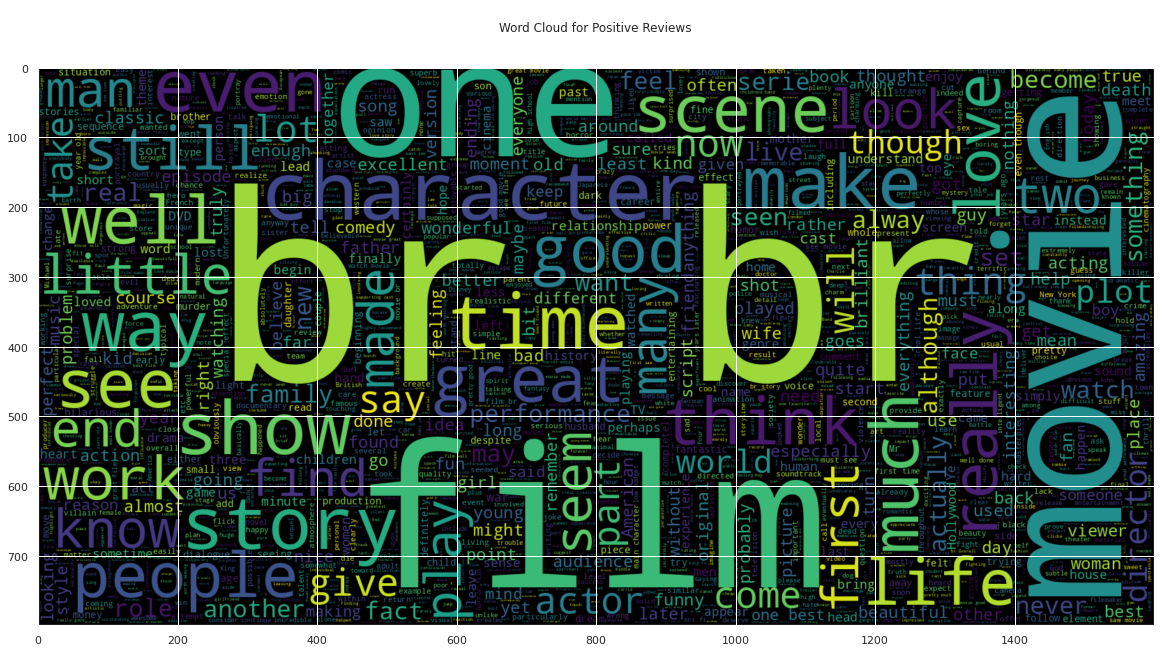

In [16]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Label == 1].Review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('\nBox plot depicting Review\'s length\n\n')
plt.title('\nWord Cloud for Positive Reviews\n\n')

### To split our dataset, we are going to use the standard 'train_test_split' function from scikit with following parameters: 
#### **1. Random state** -  of 42 (deterministic split) i.e. multiple people if running will get the same split.
#### **2. Train Size** - Indicating that 90% of data will go into train_df while 10% will go to remaining (90% of 25000)==>22500 .
#### **3. Stratify** - To keep the same input distribution (50/50) in the target set also.`

### From the 'Remaining Dataset' of 10%, we are again going to split 50% to 'valid_df'. (50% of 10% of 25000 ==>1250)
### From the 'Remaining 5%', we are going to take 90% into the 'test_df' (90% of 1250 ==>1125).

In [17]:
from sklearn.model_selection import train_test_split
train_df,remaining = train_test_split(df,random_state=42,train_size=0.9,stratify=df.Label.values)
valid_df,remaining2 = train_test_split(remaining,random_state=42,train_size=0.5,stratify=remaining.Label.values)
test_df,_ = train_test_split(remaining2,random_state=42,train_size=0.9,stratify=remaining2.Label.values)

train_df.shape,valid_df.shape,test_df.shape # 90%, 5%, 5% of the original data

((22500, 3), (1250, 3), (1125, 3))

### Now, we need to convert our data into Tensors which are multi-dimensional array required to train our model.
### We use 'from_tensor_slices' which creates a dataset with a separate element for each row of the input and then we observe some tensors:



In [18]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['Review'].values,train_df['Label'].values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df['Review'].values,valid_df['Label'].values))
  test_data = tf.data.Dataset.from_tensor_slices((test_df['Review'].values,test_df['Label'].values))
  for text,label in train_data.take(5):
    print(text)
    print(label)

tf.Tensor(b"I won't spend a lot of time nor energy on this comment. I just want to add it because all the comments were so positive I felt like I just had to let people know that not everyone is so thrilled, let alone intellectually provoked by this attempt at creating a captivating philosophical cinematic enigma. Some scenes seemed promising, playing with visual dimensions, but couldn't hold up the rest. I felt like I was stoned for the first time again, having semi-philosophical conversations with fellow adolescents.<br /><br />What a futile attempt to raise Dutch cinema to new heights. I'd rather watch Jesus is een Palestijn, without all the pretentions and with straight forward humor, also raising questions about life and the realities we create for ourselves.<br /><br />Gert de Graff is not Jean-Luc Godard or Tarkovsky and appearantly never will be.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b"In 17th Century Japan, there lived a samurai who would set 

## **Download a Pre-trained BERT Model and Instantiate Bert Layer & Tokenizer from TensorFlow Hub**
#### We are going to download pre-trained BERT model from the 'hub'.
#### To do that, We are going to define few hyper parameters that We are going to use in our code.
#### 1. **label_list** ==> The Label (output that the model will give is binary i.e. it will give 2 outputs.) 
#### 2. **max_seq_length** ==> What is the maximum length of the input sequence i.e. Maximum number of words along with any punctuations should not exceed 128.
#### So, our input sequence has to be of fixed length. However, the input sentence can be comprised of varying length (so, We need to 'pad' with that many number of blanks to make it 128).

#### 3. **train_batch_size** ==> We will feed a batch of 32 reviews at a time.

#### Bert model that we will download has L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention head


# The BERT tokenizer 
To fine tune a pre-trained model you need to be sure that you're using exactly the same tokenization, vocabulary, and index mapping as was used during training.

The BERT tokenizer used in this tutorial is written in pure Python (It's not built out of TensorFlow ops). So you can't just plug it into your model as a keras.layer like you can with preprocessing.TextVectorization.

The following code rebuilds the tokenizer that was used by the base model:

In [19]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

 # Label categories
 # 1 - Insincere Question
 # 0 - Sincere Question
label_list = [0,1]


 # maximum length of (token) input sequences
max_seq_length = 128
train_batch_size = 32



# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2', trainable=True) # Meaning, We want to 'fine-tune' by training the last layer for our custom usecase.

# Each bert layer has a number of attributes:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy() # We wil use this variable at later time (number of unique words in our dictionary/vocabulary).
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy() # We can indicate if the Model is case-sensitive or not using this parameter.
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case) # Tokenizer is an object that is responsible for generation of embeddings for 'raw input text'.


# Let's test the tokenizer for a sample text.
 \'##' indicate that that token is associated with previous one.

In [20]:
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

# Using *'convert_tokens_to_ids'* , unique ID can be assigned to each token which acts as an index to that particular word/token in an array.
**Note**: These are not embeddings, just IDs for quick hash-lookup

## **BERT WORKFLOW**
---

In [21]:
 tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?'))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

##1)  1st Layer of BERT model is of **BERT Preprocessor** which converts our raw input into 3 different encoded outputs which are needed by the BERT Layer :

#### a. **TOKEN IDs**
#### Let's assign unique number/integers to each of the token (can be thought of the index of the array where array is the whole word used for quick hash lookup)

#### b. **INPUT MASKs**
#### It identifies which token IDs of total 128 length have actual word embeddings (represented by 1) and which one have just paddings (represented by 0). The mask allows the model to cleanly differentiate between the content and the padding.

#### c. **INPUT TYPE IDs**
#### It is applicable if multiple sentences(Raw text) are fed as input to BERT Tokenizer. It represents segment of the input sentence.

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

##2) 2nd Layer is the BERT Layer where we pass these 3 outputs to produce word embeddings which of the length 768. Each word is contextually represented by an array of length 768 in terms of other word. 

##3) Finally, this is then fed to 'Keras Model' which takes this embeddings and trains the model, in the process trying to minimize loss as with other models .

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?export=view&id=1Mm6vMV5gl8msQdsy0lRk98yzC_sCi4P-' />
    <p style="text-align: center;color:gray">Figure 2: BERT Worlflow</p>
</div>

In [22]:
"""
This function uses tokenizer to convert raw text into 3 arrays - input_ids,input_mask,segment_ids.
Also makes use of classifier_data_lib class from Tensorflow.
"""
def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid=None,               # We don't need 'guid' i.e. unique id for input.
                                             text_a = text.numpy(),   # We pass raw text.
                                             text_b = None,           # Not required since We are using Masked Language Model (MLM). 
                                             label = label.numpy())   # We also pass labels.

  feature = classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length, tokenizer) # Will give a feature tuple with 3 outputs as described earlier.
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

  
  

You can use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset i.e. in parallel for all the input examples at once so that each input example is converted into these feature arrays. 

[`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

But, you can't `.map` this function directly because of below 2 problems:

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

Instead, We will wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

In [23]:
"""
This function will wrap inputs into tf.py_function.
"""
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text,label], Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])
  x = {'input_words_ids' : input_ids,
       'input_mask': input_mask,
       'input_type_id': segment_ids
       }  
  return (x, label_id)
  

# Create a TensorFlow Input Pipeline with tf.data

In [24]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map,
                               num_parallel_calls=tf.data.experimental.AUTOTUNE).shuffle(1000) # Map function takes another function as input and it operates on
  .batch(32, drop_remainder=True)                                                              #  each training data sample making parallel calls as per COREs available
  .prefetch(tf.data.experimental.AUTOTUNE)) # Will help in performance.

  # valid
  valid_data = (valid_data.map(to_feature_map,
                               num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .batch(32, drop_remainder=True)        
  .prefetch(tf.data.experimental.AUTOTUNE))

  
  

In [25]:
# train data spec (Verified that we created features for training dataset!)
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_id': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_words_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [26]:
# valid data spec (Verified that we created features for valid dataset!)
valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_id': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_words_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [27]:
# Building the model
def create_model():
  # 3 fixed length inputs
  input_words_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_words_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")
  input_type_id = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_type_id")

# BERT Layer will create embeddings of length 768 where each word is expressed in context of other words.
  pooled_output, sequence_output = bert_layer([input_words_ids, input_mask, input_type_id]) # Pooled output represents embeddings for entire sequence (not individual words). 
                                                                                            # Sequence output has embeddings for each word (not used here)

  drop = tf.keras.layers.Dropout(0.4)(pooled_output) # To avoid overfitting, We just drop 40% of the weights in the model randomly.
  output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(drop) # We are using Logistic layer/Dense layer which will convert everything into 1 output, 
                                                                              # Then, We are passing that one output to 'sigmoid' layer which will scale the output between 0-1.
  model = tf.keras.Model(
           inputs = {
               'input_type_id': input_type_id,          
               'input_mask': input_mask,               
               'input_words_ids': input_words_ids
           },
           outputs = output )
  return model
  #print(output)

# **Loss function**

---


Since this is a binary classification problem and the model outputs a probability (a single-unit layer), we'll use "losses.BinaryCrossentropy" loss function.

# **Optimizer**

---



For fine-tuning, let's use the same optimizer that BERT was originally trained with: the "Adaptive Moments" (Adam). This optimizer minimizes the prediction loss and does regularization by weight decay (not using moments), which is also known as AdamW.

In [28]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), # While compilation, We are passing optimizer such as Adam optimizer, learning rate (increments in which We take steps while trying to minimize loss)
              loss=tf.keras.losses.BinaryCrossentropy(), # We are defining Loss function here. 
              metrics=[tf.keras.metrics.BinaryAccuracy()]) # We are defining the metric that Model needs to optimize.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_words_ids (InputLayer)   [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 input_type_id (InputLayer)     [(None, 128)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_words_ids[0][0]',        
                                 (None, 128, 768)]                'input_mask[0][0]',         

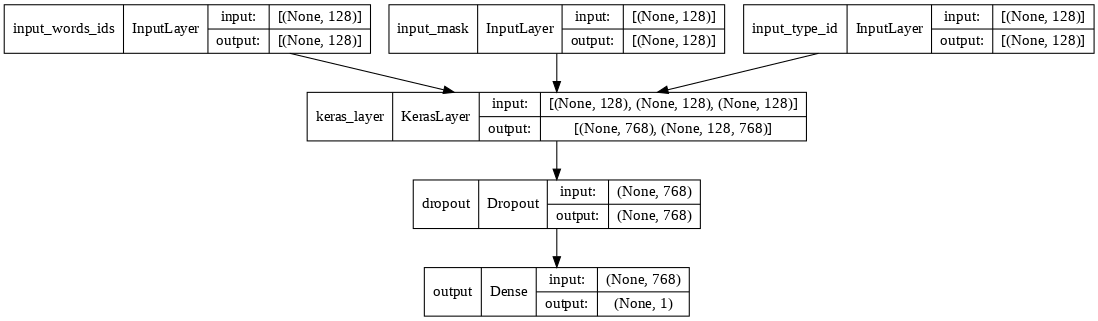

In [29]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76)

In [30]:
# Train model
epochs = 4
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1)

Epoch 1/4
703/703 [==============================] - 360s 487ms/step - loss: 0.3543 - binary_accuracy: 0.8400 - val_loss: 0.2779 - val_binary_accuracy: 0.8854
Epoch 2/4
703/703 [==============================] - 348s 489ms/step - loss: 0.2070 - binary_accuracy: 0.9178 - val_loss: 0.3250 - val_binary_accuracy: 0.8870
Epoch 3/4
703/703 [==============================] - 348s 488ms/step - loss: 0.1123 - binary_accuracy: 0.9573 - val_loss: 0.3954 - val_binary_accuracy: 0.8894
Epoch 4/4
703/703 [==============================] - 348s 488ms/step - loss: 0.0583 - binary_accuracy: 0.9795 - val_loss: 0.4306 - val_binary_accuracy: 0.8958


#**MODEL EVALUATION**

### Evaluate the BERT Text Classification Model

In [31]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

### Plotting the Loss against Epochs

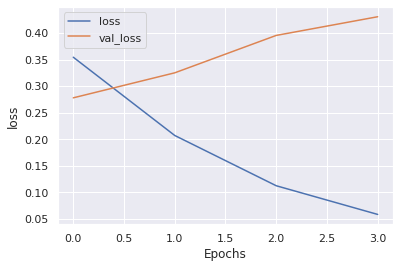

In [32]:
plot_graphs(history, 'loss')

As the number of epochs increase, our training loss is going down which is expected.
But, our validation loss is going up which means our model is slightly overfitting.

### Plotting the Accuracy against Epochs

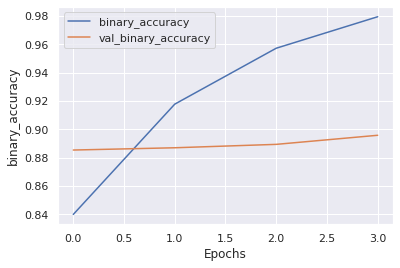

In [33]:
plot_graphs(history, 'binary_accuracy')

As the number of epochs increase, for the training data (in blue) accuracy is increasing.
Even for the 'validation data', accuracy decreased slightly but then increased which is expected.

In [34]:
sample_example = ["Every once in a while a movie comes, that truly makes an impact. Joaquins performance and scenography in all its brilliance. Grotesque, haunting and cringy. Hard to watch at times,... but so mesmerizing, you wont blink an eye watching it. Tragic, but with seriously funny moments. Emotional rollercoaster - sometimes, with multiple emotions popping-up at the same time.", 
                  "This is a very poor remake of Dirty Rotten Scoundrels and unlike that movie this one lacks in humor and talent, Rebel Wilson is woeful yet again, do not waste your money, go and rewatch the original",
                  "I went into this film expecting an all-time classic based on the reviews I had read & what I ended up watching was just a decent film overall. Phoenix is outstanding...so he definitely did his part",
                  'Apart from Eddie, the film is full of brilliant performances, in particularly by Wesley Snipes who matches and sometimes steals the show from Eddie',
                  'Do yourself a favor, watch the original and save your money. I am so tired of remaking the old movies and catering to women, and yes, I am a women']
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [1]*len(sample_example)))
test_data = test_data.map(to_feature_map).batch(1)
preds = model.predict(test_data)
threshold = 0.5
['positive' if pred >= threshold else 'negative' for pred in preds]



['positive', 'negative', 'positive', 'positive', 'negative']

# Loding of Test data present in /test directory to pandas dataframes

In [35]:
imdb_dir = 'DataSet/aclImdb'
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='UTF-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [36]:
import pandas as pd
df_test = pd.DataFrame(list(zip(texts,labels)),
                  columns = ['Review','Label'])

In [37]:
df_test.shape

(25000, 2)

In [38]:
df_test.head()

,Review,Label
0,ALERT: This review contains major SPOILERS. Do...,0
1,I don't see why everyone loves this film so mu...,0
2,Stinger starts '3 Months Ago' on the submarine...,0
3,This is one of the more unromantic movies I ha...,0
4,"The story of Ed Gein is interesting, VERY inte...",0


# **Testing on given Test Data**

In [39]:
given_test_data = tf.data.Dataset.from_tensor_slices((df_test['Review'].values,[1]*len(df_test['Review'].values)  ))

# test 

given_test_data = given_test_data.map(to_feature_map).batch(1)

preds = model.predict(given_test_data)
threshold = 0.5

prediction=[]
prediction = [1 if pred >= threshold else 0 for pred in preds]


In [41]:
# Print a classification report
y_test = df_test['Label']
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     12500
           1       0.90      0.86      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [42]:
# Print the overall accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.88128


# **Saving the model**

In [44]:
model.save((os.path.join("/content/gdrive/MyDrive/IMDBPredictions/","IMDB_Predict.h5")))

# **Fine tuning the model further**


--- Following options are possible.

1.   By changing the hyper parameters like *Learning rate*, *Epochs*.
2.   By changing the loss function to use other than *BinaryCrossEntropy*.
3.   By changing the optimizer.
4.   By changing the Keras layers.
5.   By increasing the training dataset using augmentation. 

First 3 options were tried. However, no significant improvements were observed.



# **Deploying the Model on the web using Flask**

In [ ]:
import logging
from flask import Flask, request, jsonify, url_for, render_template
import uuid
from flask_ngrok import run_with_ngrok
from flask import Flask
app = Flask(__name__,template_folder='/content/gdrive/MyDrive/IMDBPredictions/templates',
            static_folder='/content/gdrive/MyDrive/IMDBPredictions/static')
run_with_ngrok(app)   #starts ngrok when the app is run
gunicorn_logger = logging.getLogger('gunicorn.error')
app.logger.handlers = gunicorn_logger.handlers
app.logger.setLevel(gunicorn_logger.level)

Expected = {
    "Review":{"min":1,"max":2000}
}

@app.route('/')
def indexes():
  
  return render_template('MovieReview.html')


@app.route('/submitted', methods=['POST'])
def submitted():
  content = request.form['text']
  errors = []

  sample_example = [content]
  test_data = tf.data.Dataset.from_tensor_slices((sample_example, [1]*len(sample_example)))
  test_data = test_data.map(to_feature_map).batch(1)
  preds = model.predict(test_data)
  threshold = 0.5
  prediction = ['POSITIVE' if pred >= threshold else 'NEGATIVE' for pred in preds]

  return render_template('MovieReview.html',prediction= 'Movie review is '+ prediction[0] )

app.run()


<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1ohO2lm86lNgIGe6Ui9YdXgvWVX91Ukga' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>
